In [1]:
import numpy as np
import pandas as pd
from sklearn import feature_selection

# 1 过滤式特征选取

from sklearn.feature_selection import VarianceThreshold, SelectKBest, \
f_classif, SelectPercentile

## 1.1 根据方差选择特征

In [2]:
X = [[99,1,2,3],
     [100,4,5,6],
     [102,7,8,9],
     [101,11,12,13]]

selector = feature_selection.VarianceThreshold(5) # 方差小于5的特征将被删除
selector.fit(X)

print("各个特征的方差大小: %s" % selector.variances_)
print("被选特征的索引: %s" % selector.get_support(True))
print("删除小方差后的数据 \n", selector.transform(X))

各个特征的方差大小: [ 1.25   13.6875 13.6875 13.6875]
被选特征的索引: [1 2 3]
删除小方差后的数据 
 [[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [11 12 13]]


E:\software\anaconda3\lib\site-packages\sklearn\utils\__init__.py:54: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(mask.dtype, np.int):


## 1.2 选取指定标准得分最高的k个特征

In [3]:
X = [[99,1,2,3],
     [100,4,5,6],
     [102,7,8,9],
     [101,11,12,13]]
y = [0, 1, 0, 1]
selector = feature_selection.SelectKBest(score_func=feature_selection.f_classif, 
                                         k=2)
selector.fit(X, y)
print("所有特征得分:\n", selector.scores_)
print("所有特征得分的pvalues_:\n", selector.pvalues_)
print("所选特征的索引:", selector.get_support(True))
print("特征选取的结果:\n", selector.transform(X))

所有特征得分:
 [0.        0.5764706 0.5764706 0.5764706]
所有特征得分的pvalues_:
 [1.        0.5269838 0.5269838 0.5269838]
所选特征的索引: [2 3]
特征选取的结果:
 [[ 2  3]
 [ 5  6]
 [ 8  9]
 [12 13]]


E:\software\anaconda3\lib\site-packages\sklearn\utils\__init__.py:54: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(mask.dtype, np.int):


## 1.3 选取指定标准得分的百分比选择特征

In [4]:
X = [[99,1,2,3],
     [100,4,5,6],
     [102,7,8,9],
     [101,11,12,13]]
y = [0, 1, 0, 1]
selector = feature_selection.SelectPercentile(score_func=feature_selection.f_classif, 
                                              percentile=80)
selector.fit(X,y)
print("所有特征得分:\n",selector.scores_)
print("所有特征得分的pvalues_:\n",selector.pvalues_)
print("所选特征的索引:",selector.get_support(True))
print("特征选取的结果:\n",selector.transform(X))

所有特征得分:
 [0.        0.5764706 0.5764706 0.5764706]
所有特征得分的pvalues_:
 [1.        0.5269838 0.5269838 0.5269838]
所选特征的索引: [1 2 3]
特征选取的结果:
 [[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [11 12 13]]


E:\software\anaconda3\lib\site-packages\sklearn\utils\__init__.py:54: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(mask.dtype, np.int):
E:\software\anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


# 2 包裹式特征选取

In [5]:
from sklearn.feature_selection import RFE, RFECV
from sklearn.svm import LinearSVC
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X = iris.data
y = iris.target

In [6]:
selector = feature_selection.RFE(estimator=LinearSVC(), 
                                 n_features_to_select=2) # 选出2个特征
selector.fit(X, y)
print("选取的特征个数: %s" % selector.n_features_)
print("选取的特征是: %s" % selector.support_)
print("特征重要度排序: %s" % selector.ranking_) # 被选中的特征均为1,其余再排序

选取的特征个数: 2
选取的特征是: [False  True False  True]
特征重要度排序: [3 1 2 1]


In [8]:
# 测试选取与不选取的区别
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   test_size=0.25, 
                                                   random_state=0,
                                                   stratify=y)
clf = LinearSVC()
clf.fit(X_train, y_train)

print("Original DataSet: test score=%s"%(clf.score(X_test, y_test)))

selector = feature_selection.RFE(estimator=LinearSVC(), 
                                 n_features_to_select=2)
X_t = selector.fit_transform(X, y)
X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(X_t, y, 
                                                            test_size=0.25, 
                                                            random_state=0, 
                                                            stratify=y)
clf_t = LinearSVC()
clf_t.fit(X_train_t, y_train_t)
print("Selected DataSet: test score=%s"%(clf_t.score(X_test_t, y_test_t)))

Original DataSet: test score=0.9736842105263158
Selected DataSet: test score=0.9473684210526315


E:\software\anaconda3\lib\site-packages\sklearn\utils\__init__.py:54: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(mask.dtype, np.int):


In [9]:
selector = feature_selection.RFECV(estimator=LinearSVC(), cv=5) # 5折交叉验证
selector.fit(X,y)
print("N_features %s" % selector.n_features_)
print("Support is %s" % selector.support_)
print("Ranking %s" % selector.ranking_)
print("Grid Scores %s" % selector.grid_scores_)

N_features 4
Support is [ True  True  True  True]
Ranking [1 1 1 1]
Grid Scores [0.91333333 0.95333333 0.96       0.96666667]


E:\software\anaconda3\lib\site-packages\sklearn\utils\__init__.py:54: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(mask.dtype, np.int):


# 3 嵌入式特征选取

In [17]:
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
from sklearn.datasets import load_digits, load_diabetes
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso

digits = load_digits()
X = digits.data
y = digits.target
print(X.shape, y.shape)
print(X[0])
print(y[0], '\n')

diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target
print(X.shape, y.shape)
print(X[0])
print(y[0])

(1797, 64) (1797,)
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
0 

(442, 10) (442,)
[ 0.03807591  0.05068012  0.06169621  0.02187235 -0.0442235  -0.03482076
 -0.04340085 -0.00259226  0.01990842 -0.01764613]
151.0


In [18]:
def test_SelectFromModel(X, y):
    estimator = LinearSVC(penalty='l1', dual=False)
    selector = SelectFromModel(estimator=estimator, threshold='mean')
    selector.fit(X, y)
    xx = selector.transform(X)
    print("X:", X.shape)
    print("xx:", xx.shape)
    print("\n特征选取的阈值属性: ", selector.threshold_)
    dataIndex = selector.get_support(indices=True) # numpy.ndarray
    print("被选中的特征的下标: \n", dataIndex)

digits = load_digits()
X = digits.data
y = digits.target
test_SelectFromModel(X, y)

X: (1797, 64)
xx: (1797, 32)

特征选取的阈值属性:  0.7051469307905502
被选中的特征的下标: 
 [ 2  3  4  5  6  9 12 14 16 18 19 20 21 22 24 25 26 27 30 33 36 38 41 42
 43 44 45 53 54 55 58 61]


E:\software\anaconda3\lib\site-packages\sklearn\utils\__init__.py:54: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(mask.dtype, np.int):


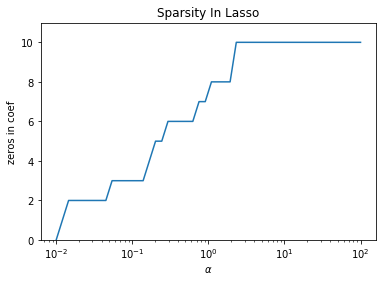

In [19]:
def test_Lasso(*data):
    # 测试 alpha 与稀疏性的关系
    X, y = data
    alphas = np.logspace(-2, 2) # 50个数
    zeros = []
    for alpha in alphas:
        regr = Lasso(alpha=alpha)
        regr.fit(X, y)
        num = 0
        for ele in regr.coef_:
            if abs(ele) < 1e-5:
                num += 1
        zeros.append(num)
        
    ##### 绘图
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alphas, zeros)
    ax.set_xlabel(r"$\alpha$")
    ax.set_xscale("log")
    ax.set_ylim(0, X.shape[1]+1)
    ax.set_ylabel("zeros in coef")
    ax.set_title("Sparsity In Lasso")
    plt.show()

diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target
test_Lasso(X, y)

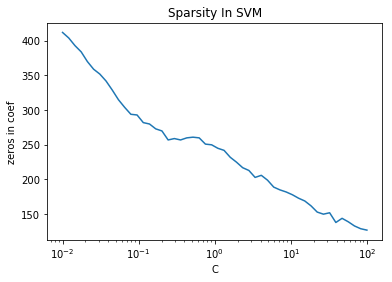

In [20]:
def test_LinearSVC(*data):
    '''
    测试 C  与 稀疏性的关系
    '''
    X, y = data
    Cs = np.logspace(-2, 2)
    zeros = []
    for C in Cs:
        clf = LinearSVC(C=C, penalty='l1', dual=False)
        clf.fit(X, y)
        num = 0
        for row in clf.coef_:
            for ele in row:
                if abs(ele) < 1e-5:
                    num += 1
        zeros.append(num)
    # 绘图
    fig=plt.figure()
    ax=fig.add_subplot(1, 1, 1)
    ax.plot(Cs, zeros)
    ax.set_xlabel("C")
    ax.set_xscale("log")
    ax.set_ylabel("zeros in coef")
    ax.set_title("Sparsity In SVM")
    plt.show()

digits = load_digits()
X = digits.data
y = digits.target    
test_LinearSVC(X, y)